
 SMS spam detection system is used to detect SMS spam using Machine Learning technique called Natural Language Processing and Python, where we have a dataset contain a lot of SMS by extract important words and then use naive classifier we can detect if this SMS is spam or not.

### Libraries

Importing the Required Libraries

In [34]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt
%matplotlib inline

# Pickle Library for Saving the Model
import pickle

import nltk

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes,BernoulliNB are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# seaborn for ploting charts
import seaborn as sns

# World coount for counting
from wordcloud import WordCloud

import string

### Reading informations in the Dataset

In [35]:
messages = pd.read_csv("./data/sms-spam.csv",encoding='latin1')

Checking for null values in Data



In [36]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Checking the First Five Values in the Data

In [37]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
messages.shape

(5572, 5)

Checking the Last Five Values in the Data



In [39]:
messages.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Taking the required Columns in the Dataset



In [40]:
messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [41]:
messages = messages[['v1', 'v2']]
messages.columns = ['label', 'message']
messages.replace({'label':{'ham':'0','spam':'1'}},inplace=True)
messages.sample(10)     

,label,message
2308,1,Moby Pub Quiz.Win a ï¿½100 High Street prize i...
608,0,Neva mind it's ok..
2336,0,\Aww you must be nearly dead!Well Jez isComing...
1994,0,Have you been practising your curtsey?
3584,0,Heart is empty without love.. Mind is empty wi...
8,1,WINNER!! As a valued network customer you have...
1009,0,"Dear Hero,i am leaving to qatar tonite for an ..."
801,0,Appt is at &lt;TIME&gt; am. Not my fault u don...
3181,0,"My Parents, My Kidz, My Friends n My Colleague..."
2383,0,Your pussy is perfect!


In [42]:
messages.isnull().sum()

label      0
message    0
dtype: int64

### Categorical analysis and visualization

In [43]:
messages['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [44]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [45]:
messages.sample(5)     

,label,message
999,0,"Aight will do, thanks again for comin out"
3108,0,Lol I was gonna last month. I cashed some in b...
5437,0,Am slow in using biola's fne
4680,0,Are you staying in town ?
4074,0,"God picked up a flower and dippeditinaDEW, lov..."


In [46]:
spam_messages = messages[messages["label"] == "1"]
ham_messages = messages[messages["label"] == "0"]
print("No of spam messages:", len(spam_messages))
print("No of ham messages:", len(ham_messages))

No of spam messages: 747
No of ham messages: 4825


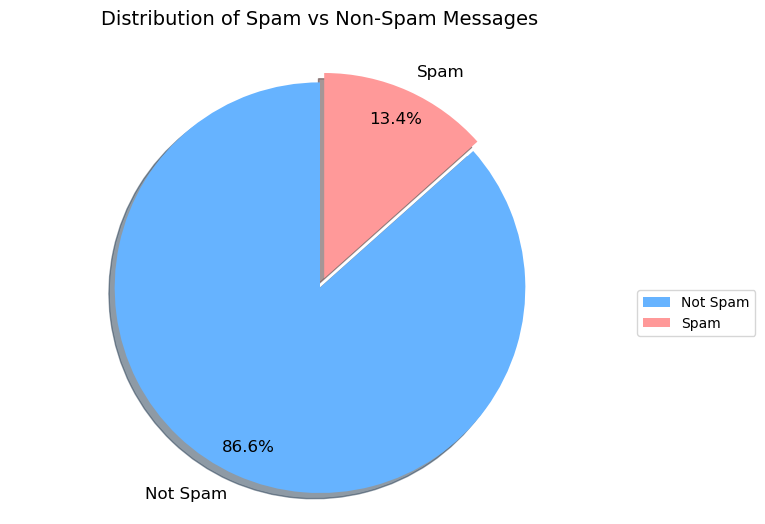

In [47]:
#Pie Chart

sizes = messages['label'].value_counts()
colors = ['#66b3ff', '#ff9999']  # Light blue and light red
explode = (0.05, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        explode=explode,
        labels=['Not Spam', 'Spam'],
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12})

plt.title('Distribution of Spam vs Non-Spam Messages', pad=20, fontsize=14)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()


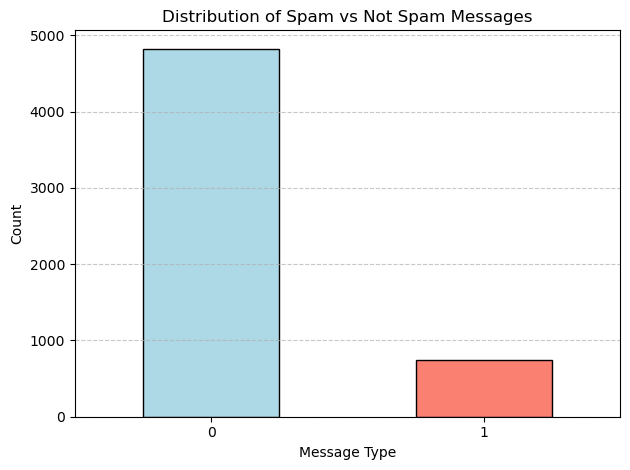

In [48]:
# Bar Chart

messages['label'].value_counts().plot(kind='bar',
                                 color=['lightblue', 'salmon'],
                                 edgecolor='black')


plt.title('Distribution of Spam vs Not Spam Messages', fontsize=12)
plt.xlabel('Message Type', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

In [49]:
# Create separate dataframes for ham and spam messages
ham_msg = messages[messages.label == '0']
spam_msg = messages[messages.label == '1']

# Create text corpus for word clouds
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

In [50]:
print(ham_msg['message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


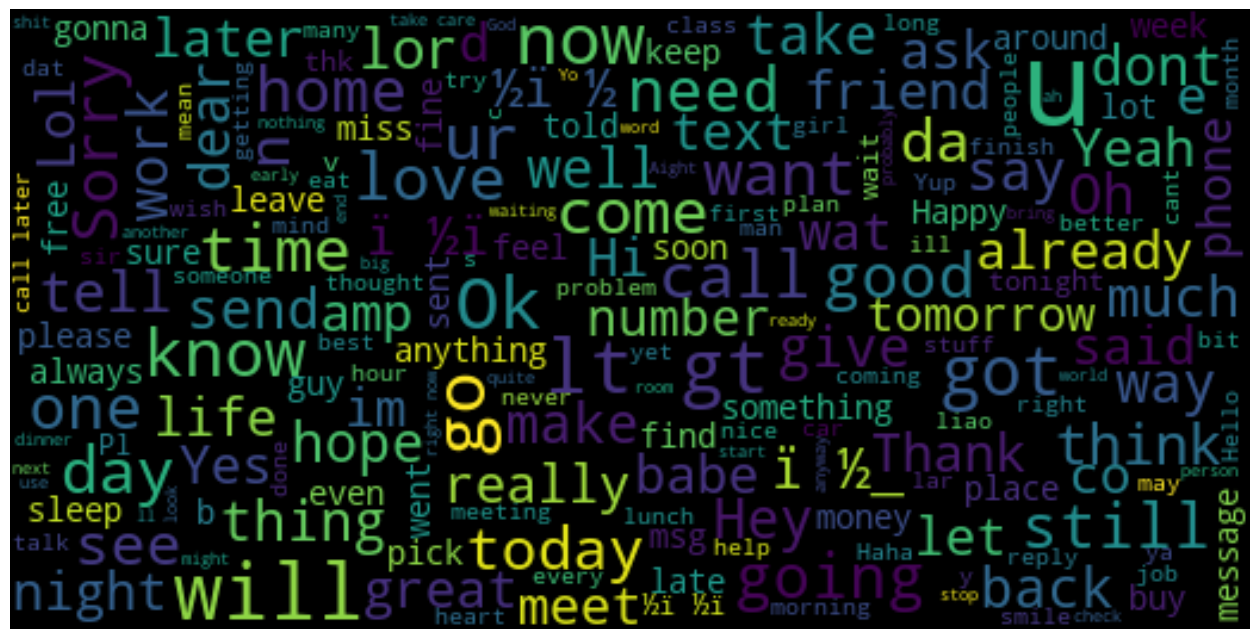

In [51]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black").generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

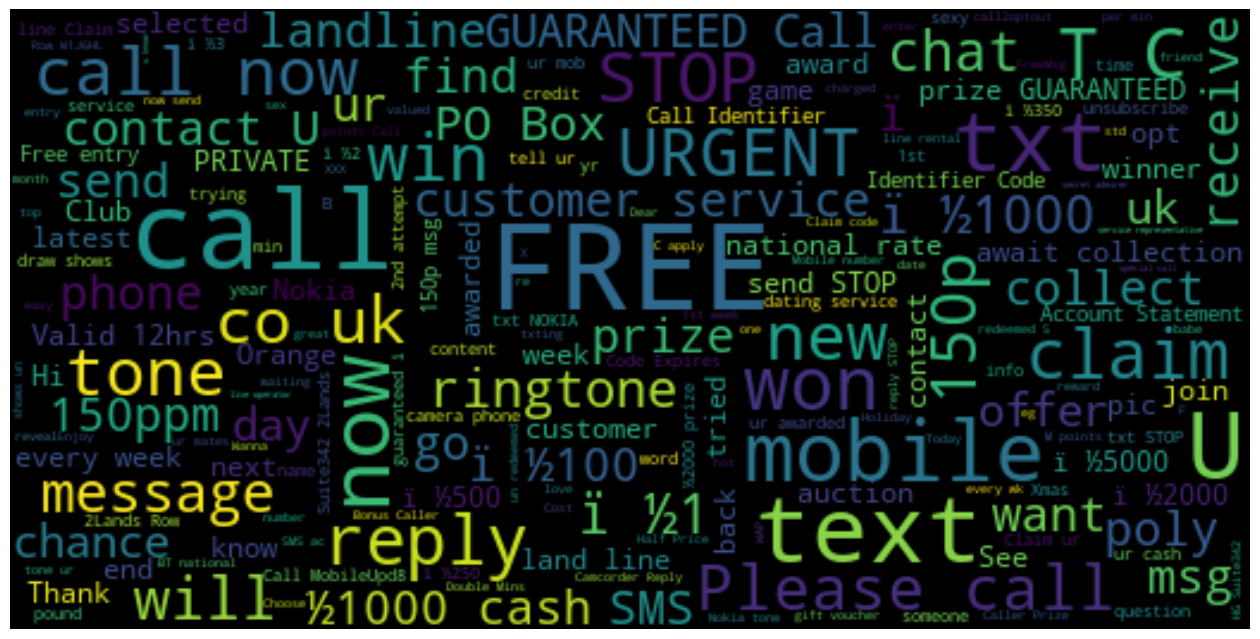

In [52]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black").generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

### NLP

Preprocessing the Text in the Dataset

In [53]:
def text_preprocess(mess):
   
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [54]:
messages["message"] = messages["message"].apply(text_preprocess)

In [55]:
messages.head()

,label,message
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [56]:
# Join the preprocessed words back into strings

messages['message'] = messages['message'].apply(' '.join)

In [57]:

vectorizer = CountVectorizer()
X  = vectorizer.fit_transform(messages['message']).toarray()
Y = pd.get_dummies(messages['label'])
Y = Y.iloc[:, 1].values


In [58]:
X.shape

(5572, 8046)

### Data Modeling

Splitting the Dataset into Training and Testing Set

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.6)

In [60]:
print("Trained Messages:", len(X_train))
print("Tested Messages:",len(X_test))
print("Trained Labels:",len(Y_train))
print("Tested Labels:",len(Y_test))

Trained Messages: 2228
Tested Messages: 3344
Trained Labels: 2228
Tested Labels: 3344


### Model Building

Creating the Models

In [61]:

# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# # Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# # Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

# # Model 4 - BernoulliNB
model4 = BernoulliNB()
model4.fit(X_train, Y_train)

BernoulliNB()

 Accuracy Score and Confusion Matrix for Analysis of Models


In [62]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("\nDecision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naive Bayes
print("\nMultinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

# Model 4-BernoulliNB
print("\nBernoulliNB")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred4))
print("Accuracy: ", accuracy_score(Y_test, pred4))

Random Forest Classifier
Confusion Matrix: 
[[2883    0]
 [ 116  345]]
Accuracy:  0.965311004784689
--------------------------------

Decision Tree Classifier
Confusion Matrix: 
[[2811   72]
 [ 105  356]]
Accuracy:  0.9470693779904307
--------------------------------

Multinomial Naïve Bayes
Confusion Matrix: 
[[2810   73]
 [  49  412]]
Accuracy:  0.9635167464114832

BernoulliNB
Confusion Matrix: 
[[2879    4]
 [ 250  211]]
Accuracy:  0.9240430622009569


Reports For All Models

In [63]:

report1 = classification_report(Y_test, pred1)
print("\nClassification Report for Random Forest Classifier \n\n", report1)

report2 = classification_report(Y_test, pred2)
print("\nClassification Report for Decision Tree Classifier \n\n", report2)

report3 = classification_report(Y_test, pred3)
print("\nClassification Report for Multinomial Naive Bayes \n\n", report3)

report4 = classification_report(Y_test,pred4)
print("\nClassification Report for BernoulliNB\n\n", report4)



Classification Report for Random Forest Classifier 

               precision    recall  f1-score   support

       False       0.96      1.00      0.98      2883
        True       1.00      0.75      0.86       461

    accuracy                           0.97      3344
   macro avg       0.98      0.87      0.92      3344
weighted avg       0.97      0.97      0.96      3344


Classification Report for Decision Tree Classifier 

               precision    recall  f1-score   support

       False       0.96      0.98      0.97      2883
        True       0.83      0.77      0.80       461

    accuracy                           0.95      3344
   macro avg       0.90      0.87      0.89      3344
weighted avg       0.95      0.95      0.95      3344


Classification Report for Multinomial Naive Bayes 

               precision    recall  f1-score   support

       False       0.98      0.97      0.98      2883
        True       0.85      0.89      0.87       461

    accuracy      

Saving all train model in pickle file

In [64]:
filename = "./models/Random_Forest_Classifier.pkl"
pickle.dump(model1, open(filename, 'wb'))

filename = "./models/Decision_Tree_Classifier.pkl"
pickle.dump(model2, open(filename, 'wb'))

filename = "./models/Multinomial_Naive_Bayes.pkl"
pickle.dump(model3, open(filename, 'wb'))

filename = "./models/BernoulliNB.pkl"
pickle.dump(model4,open(filename,'wb'))

pickle.dump(vectorizer,open('./models/vectorizer.pkl','wb'))

print("Saved all Models")


Saved all Models
